In [3]:
### Inaugural project

#Syed Tayyeb Hussain Shah and Shainur Akter
# Question 1
# Starting with making the neccesary imports

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt


In [2]:
# 

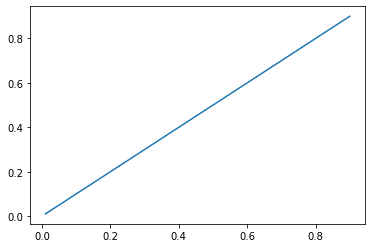

In [4]:
# Question 1 
#i) contructing a function that takes (x,y,p) as arguments and returns utility

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt 

def utility(z, theta):
    """ Calculates agents utility"""
    return (z**(1+theta))/(1+theta)

def premium(p, q):
    """ Calculates the agents premium """
    return p*q

def insurance_u(p, y, x, q):
    """ Returns utillty with insurance """
    return p*utility(y-x+q-premium(p,q), theta)+(1-p)*utility(y-premium(p,q),theta)

y = 1
p = 0.2
theta = -2


## Question 1 ii) we have to make the grid, here we use the following functions for this:
xs = np.linspace(0.01,0.9,100)
q_star = np.zeros(100)

## Question 1 iii) we are trying to solve the optimum problem here. We are defining the opt function
def opt(p,y,x):
    """ Returns optimal q in the range (0,x) """
    obj = lambda q: -insurance_u(p,y,x,q)
    res = optimize.minimize_scalar(obj,bounds=(0,x), method='bounded')
    return res.x

for i in range(100):
    q_star[i] = opt(p,y,xs[i])

## Question 1 iv) plotting the optimal q's for xs:
plt.plot(xs,q_star)
## We can see from the graph that the optimal coverage is equal to the loss of agent, which gives
# intuitively meaning


In [5]:
# Questio 2 i)
# Here we have to find the set of acceptable contracts from the agents point of view. 
# we want to see whether the utility is as least at good an insured agent. we are using x=0.6

# First we define the function for not having insurance:



# Defining utiliy from insurance with x=0.6
x= 0.6


def v_pi(pi, q, x, y, p):
    """ Returns utility with insurance """
    return p*utility(y-x+q-pi, theta)+(1-p)*utility(y-pi, theta)

V0 = v_pi(0, 0, x, y, p)
# Section ii)
def opt_pi(q, x, y, p):
    """ Returns the optimal contracts for the agent """
    def obj(pi):
        return v_pi(pi, q, x, y, p)-V0
    res = optimize.root(obj, 0.01)
    return res.x

""" Making a grid for x and q """
xs2 = np.linspace(0.01,0.6,100)
q_star2 = np.zeros(100)

for i, q in enumerate(xs2):
    q_star2[i]=opt_pi(q, x, y, p)


<function matplotlib.pyplot.show(close=None, block=None)>

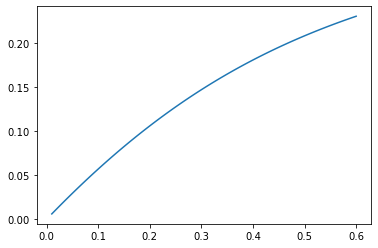

In [6]:
# plotting xs2 and q_star2
plt.plot(xs2, q_star2)
plt.set_xlabel = ('Agents loss of asset')
plt.set_ylabel = ('Insurance cover amount')
plt.show
    
# This shows the acceptable premiums 

In [7]:
# Question 3

# i) creating a function that computes V(Gamma, pi) by montecarlo integration using 10.000 draws. 

# First list variables and creating functions


a = 2
b = 7
N = 10000

def agent_value(y, gamma, x, pi):
    """ Returns the agents utility from a beta distribution """
    return utility(y-(1-gamma)*x-pi, theta)

def monte_carlo(pi, gamma, y, p):
    """ returns a montecarlo integration with 10.000 draws """
    yy = np.random.beta(a, b, size = N)
    for i, x in enumerate(yy):
        yy[i] = agent_value(y, gamma, x, pi)
    mean = np.mean(yy)
    return mean

## section ii) printing for (gamma, pi)= (0.9,0.2) and 
    
print(monte_carlo(0.2, 0.9, y, p))
print(monte_carlo(0.1, 0.45, y, p))
## We see that the first is the most prefferable to the agent. 


-1.2859565012168455
-1.2980519361632206


In [9]:
# Question 4 i) 

# In this section we have to optimize pi from the company's point of view, that is maximizing pi!

# A costumer demands coverage ratio gamma = 0.95, how can we optimize pi?

# We optimize pi doing so:
pi_star = 0.5

def opt_mc(pi_star, gamma, y, p, v0):
    """ Returns optimal premium for a given coverage ratio """ 
    
    def obj_mc(pi_star):
        return monte_carlo(pi_star, gamma, y, p)-V0
    res = optimize.root(obj_mc, 0.1, method = "broyden1")
    
    return res.x

print(opt_mc(pi_star, 0.95, y, p, V0))
        
    
# The optimal premium is given below


## During this projoct we had problems with plotting minimum premiums in question 2 and also 
# putting labels togehter since the plt coding was not working with us. 



0.21957491059784398
